In [10]:
import torch
import numpy as np
import os
import cv2

import matplotlib.pyplot as plt
#from charSet import get_charSet, init_charSet


In [26]:
MAX_LENGTH = 29
WINDOW_SIZE = 5
BATCH_SIZE = 10
WORD_DICTIONARY =  [line.strip() for line in open(str(os.path.abspath(os.getcwd()))+'/dictionary.txt', 'r')]









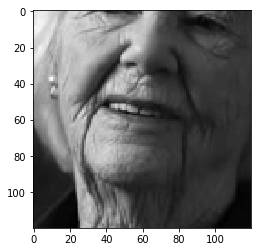

In [27]:
def sliding_window(arr, window_size):
    """
    Input a D-dimensional numpy ndarray arr
    Returns a D+1-dimensional numpy ndarray    :param arr: numpy ndarray
    :param window_size: size of sliding window
    :return: a numpy array containing the slices of the input
    """
    output_len = arr.shape[0] - window_size + 1
    indexer = np.arange(window_size)[None, :] + np.arange(output_len)[:, None]
    return arr[indexer]


def generate_batch(batch_size=BATCH_SIZE):
    videos =  np.array(os.listdir(str(os.path.abspath(os.getcwd()))+'/videos'))
    random_folder = videos[np.random.randint(len(videos), size=BATCH_SIZE)]
    random_number = np.random.randint(1000,size=BATCH_SIZE)
    batch = [str(os.path.abspath(os.getcwd()))+'/videos/'+str(random_folder[i])+'/'+str(random_folder[i])+'_'+str(random_number[i]).zfill(5)+'.mp4' for i in range(BATCH_SIZE)]
    t = np.array([WORD_DICTIONARY.index(l) for l in random_folder])
    return  batch,t

    

BATCH_SIZE = 10
final_t = []
final=[]


batch, final_t = generate_batch()


for i in batch:
    cap = cv2.VideoCapture(i)
    tmp = np.zeros((MAX_LENGTH,120,120))
    count = 0
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret:
            # Our operations on the frame come here
            gray = (cv2.cvtColor(frame[100:220,70:190], cv2.COLOR_BGR2GRAY))
            tmp[count]=gray
            count +=1
            plt.imshow(gray, cmap='gray')
            # Display the resulting frame
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    #try:

    #idx = [i for i in range(MAX_LENGTH - 1, -1, -1)]
    #final.append(sliding_window(tmp[idx, :, :],WINDOW_SIZE))

    #if length <= 0:
#        length = torch.tensor(1)
    cap.release()
    cv2.destroyAllWindows()
    
#except:
#    print('#############################', dir)
#    length = torch.tensor(1)




In [29]:
final_result = torch.from_numpy(np.array(final))
final_ytorch = torch.from_numpy(np.array(final_t))
print(final_result.shape)
print(final_ytorch.shape)

torch.Size([10, 25, 5, 120, 120])
torch.Size([10])
